In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf


In [3]:
import sys
print(sys.version)

3.9.0 (tags/v3.9.0:9cf6752, Oct  5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
import tensorflow as tf, keras, numpy as np

In [6]:
import sys
print("sys.executable:", sys.executable)
import platform
print("python:", platform.python_version())
import subprocess, json, sys
subprocess.run([sys.executable, "-m", "pip", "list"])

sys.executable: c:\Python39\python.exe
python: 3.9.0


CompletedProcess(args=['c:\\Python39\\python.exe', '-m', 'pip', 'list'], returncode=0)

In [23]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO and WARNING messages


In [24]:
data_dir='D:\Real-World-Projects\Human Facial Emotion Detection\images'

train_dir=os.path.join(data_dir,'train')
validation_dir =os.path.join(data_dir,'validation')

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen =ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48,48),
    batch_size=64,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)


Found 28821 images belonging to 7 classes.


In [27]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48,48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 7066 images belonging to 7 classes.


EDA (Visualizing some data)

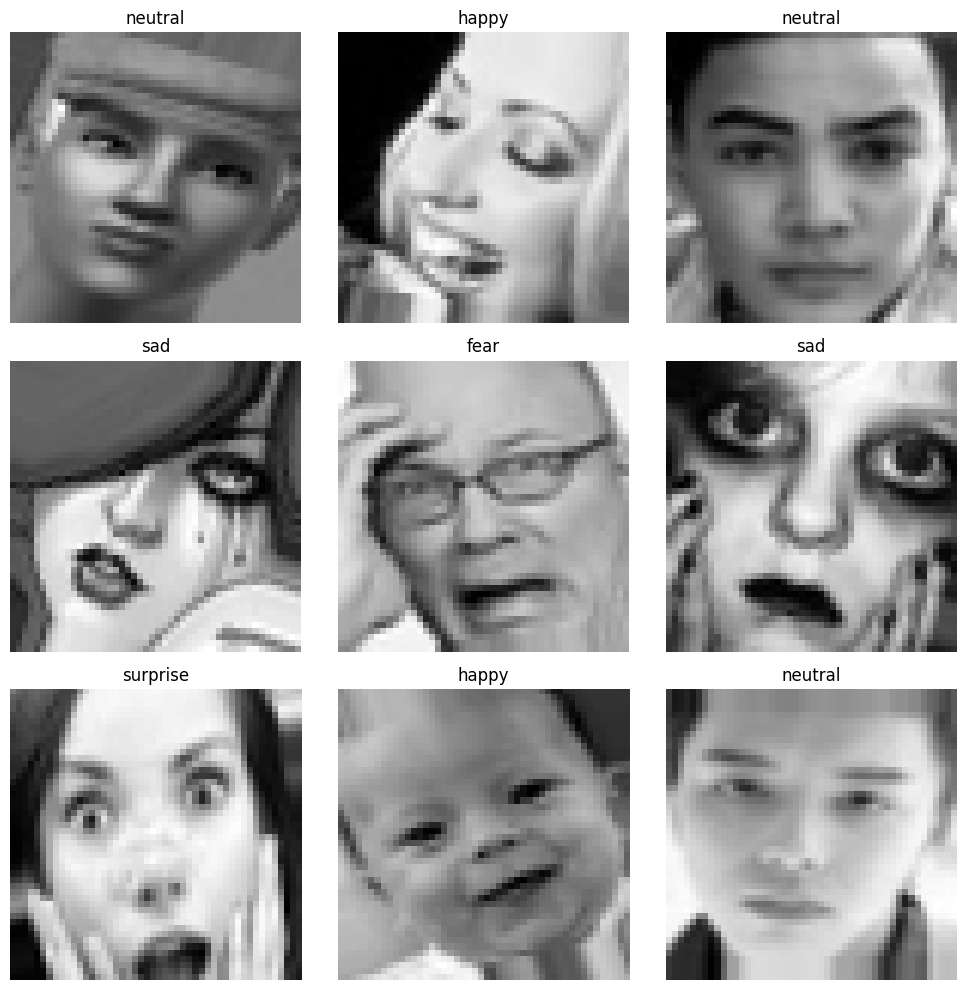

In [28]:
class_names = list(train_generator.class_indices.keys())
images,labels = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].reshape(48,48),cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')

plt.tight_layout()
plt.show()

CNN Model Architecture

In [29]:
model = Sequential([
    # 1 feacture extraction
    # 1st conv layer
    Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # 2nd conv layer
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),
    
    # 3rd conv layer
    Conv2D(256,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),

    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # output layer

    Dense(7,activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_4 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_5 (Bat  (None, 21, 21, 128)      

Model training

In [31]:
# callbacks
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

lr_sceduler =ReduceLROnPlateau()

# model training
history =model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping,lr_sceduler]
)

Epoch 1/50


451/451 [==============================] - 543s 1s/step - loss: 2.1072 - accuracy: 0.2724 - val_loss: 1.9186 - val_accuracy: 0.3329 - lr: 0.0010
Epoch 2/50
451/451 [==============================] - 171s 378ms/step - loss: 1.6173 - accuracy: 0.3890 - val_loss: 1.5409 - val_accuracy: 0.4114 - lr: 0.0010
Epoch 3/50
451/451 [==============================] - 162s 358ms/step - loss: 1.4589 - accuracy: 0.4404 - val_loss: 1.4196 - val_accuracy: 0.4676 - lr: 0.0010
Epoch 4/50
451/451 [==============================] - 180s 398ms/step - loss: 1.3922 - accuracy: 0.4650 - val_loss: 1.3522 - val_accuracy: 0.4918 - lr: 0.0010
Epoch 5/50
451/451 [==============================] - 216s 478ms/step - loss: 1.3573 - accuracy: 0.4799 - val_loss: 1.3597 - val_accuracy: 0.4752 - lr: 0.0010
Epoch 6/50
451/451 [==============================] - 247s 547ms/step - loss: 1.3239 - accuracy: 0.4939 - val_loss: 1.3911 - val_accuracy: 0.4942 - lr: 0.0010
Epoch 7/50
451/451 [===========================

Evaluation classification Report and confusion matrix

In [ ]:
val_imgaes, val_labels = next(validation_generator)
predictions = model.predict(val_imgaes)

y_true = np.argmax(val_labels, axis=1)
y_pred = np.npla